#### 设置环境

False
1.13.1
None
torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([60000, 28, 28])
torch.Size([60000])
5


c:\Users\24798\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\Users\24798\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


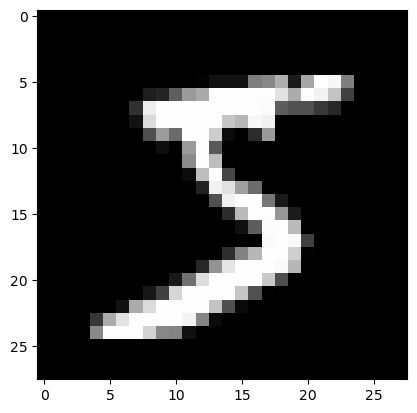

0


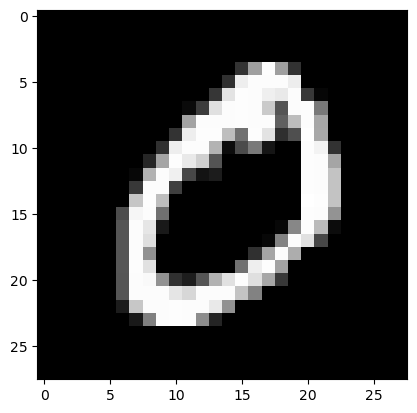

torch.Size([10000, 28, 28])
torch.Size([10000])
CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output_layer): Linear(in_features=1568, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             416
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]          12,832
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d-6

C:\Users\24798\AppData\Local\Temp\ipykernel_16896\2502160649.py:100: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  test_x = Variable(


Epoch 0 | Step 0 | Loss 2.2919745445251465 | Test Accuracy 0.1415
Epoch 0 | Step 50 | Loss 0.36743050813674927 | Test Accuracy 0.8235
Epoch 0 | Step 100 | Loss 0.12346651405096054 | Test Accuracy 0.919
Epoch 0 | Step 150 | Loss 0.3369375169277191 | Test Accuracy 0.932
Epoch 0 | Step 200 | Loss 0.1289987862110138 | Test Accuracy 0.9445
Epoch 0 | Step 250 | Loss 0.12198540568351746 | Test Accuracy 0.959
Epoch 0 | Step 300 | Loss 0.11786369234323502 | Test Accuracy 0.9645
Epoch 0 | Step 350 | Loss 0.06661216914653778 | Test Accuracy 0.9655
Epoch 0 | Step 400 | Loss 0.10795900970697403 | Test Accuracy 0.964
Epoch 0 | Step 450 | Loss 0.10127169638872147 | Test Accuracy 0.97
Epoch 0 | Step 500 | Loss 0.07933623343706131 | Test Accuracy 0.972
Epoch 0 | Step 550 | Loss 0.1603575497865677 | Test Accuracy 0.9705
Epoch 1 | Step 0 | Loss 0.06289131939411163 | Test Accuracy 0.9775
Epoch 1 | Step 50 | Loss 0.10069328546524048 | Test Accuracy 0.9775
Epoch 1 | Step 100 | Loss 0.030603323131799698 | Te

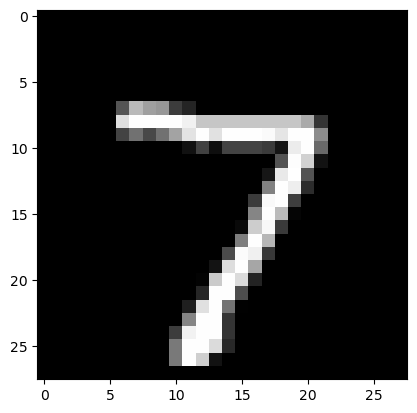

Predict 2
Real 2


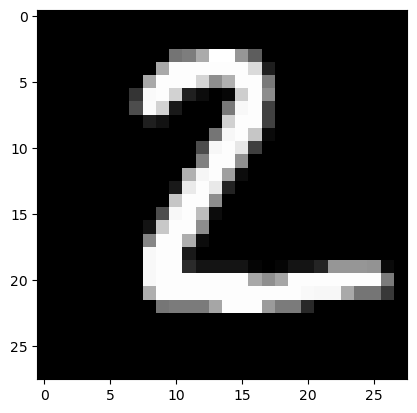

Predict 1
Real 1


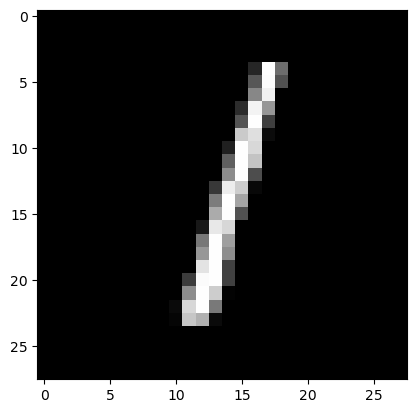

Predict 0
Real 0


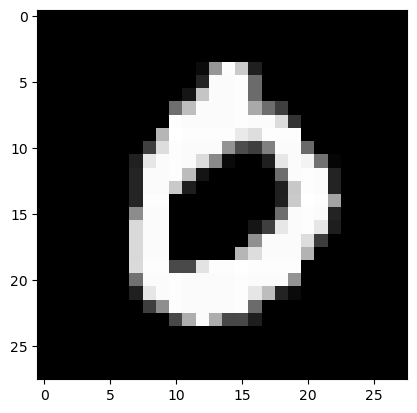

Predict 4
Real 4


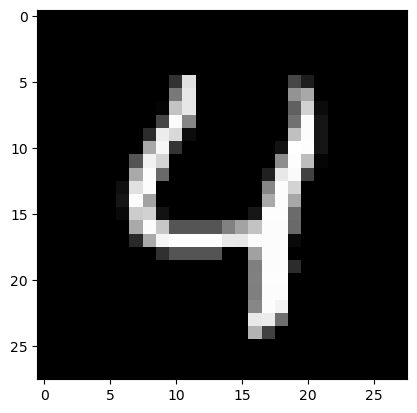

Predict 1
Real 1


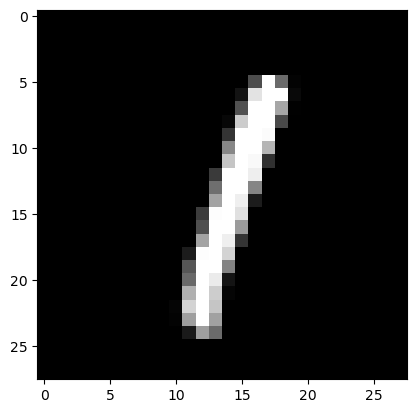

Predict 4
Real 4


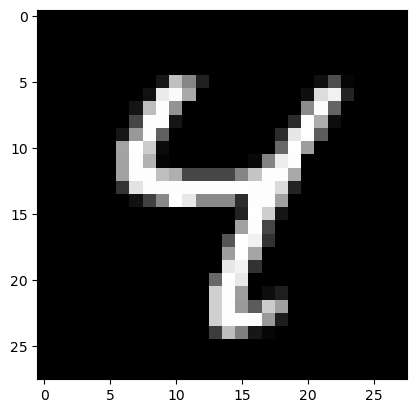

Predict 9
Real 9


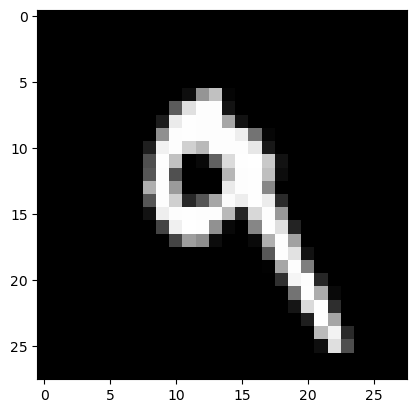

Predict 5
Real 5


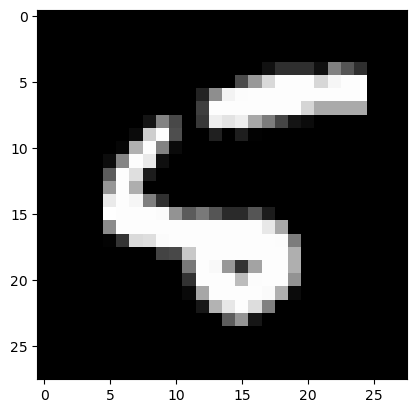

Predict 9
Real 9


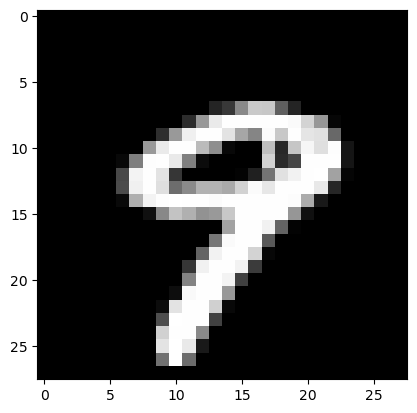

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
print(torch.cuda.is_available())
print(torch.__version__)
print(torch.version.cuda)
from torch.autograd import Variable
import torch.utils.data as Data
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torchsummary import summary
import time
# 创建神经网络
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.output_layer = nn.Linear(32*7*7, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.reshape(x.size(0), -1)
        output = self.output_layer(x)
        return output


# 超参数
EPOCH = 10
BATCH_SIZE = 100
LR = 0.001
DOWNLOAD = False  # 若已经下载mnist数据集则设为False

# 下载mnist数据
train_data = datasets.MNIST(
    root='./data',  # 保存路径
    train=True,  # True表示训练集，False表示测试集
    transform=transforms.ToTensor(),  # 将0~255压缩为0~1
    download=DOWNLOAD
)

# 旧的写法
print(train_data.train_data.size())
print(train_data.train_labels.size())

# 新的写法
print(train_data.data.size())
print(train_data.targets.size())

# 打印部分数据集的图片
for i in range(2):
    print(train_data.targets[i].item())
    plt.imshow(train_data.data[i].numpy(), cmap='gray')
    plt.show()

# DataLoader
train_loader = Data.DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

# 如果train_data下载好后，test_data也就下载好了
test_data = datasets.MNIST(
    root='./data',
    train=False
)

print(test_data.data.size())
print(test_data.targets.size())

# 新建网络
cnn = CNN()
print(cnn)

# 查看网络的结构
model = CNN()
if torch.cuda.is_available():
    model.cuda()
summary(model, input_size=(1, 28, 28))

# 优化器
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)

# 损失函数
loss_func = nn.CrossEntropyLoss()

# 为了节约时间，只使用测试集的前2000个数据
test_x = Variable(
    torch.unsqueeze(test_data.data, dim=1),
    volatile=True
).type(torch.FloatTensor)[:2000]/255  # 将将0~255压缩为0~1

test_y = test_data.targets[:2000]

# 开始计时
start = time.time()

# 训练神经网络
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        output = cnn(batch_x)
        loss = loss_func(output, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 每隔50步输出一次信息
        if step % 50 == 0:
            test_output = cnn(test_x)
            predict_y = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = (predict_y == test_y).sum().item() / test_y.size(0)
            print('Epoch', epoch, '|', 'Step', step, '|', 'Loss',
                  loss.data.item(), '|', 'Test Accuracy', accuracy)

# 结束计时
end = time.time()

# 训练耗时
print('Time cost:', end - start, 's')

# 预测
test_output = cnn(test_x[:100])
predict_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
real_y = test_y[:100].numpy()
print(predict_y)
print(real_y)

# 打印预测和实际结果
for i in range(10):
    print('Predict', predict_y[i])
    print('Real', real_y[i])
    plt.imshow(test_data.data[i].numpy(), cmap='gray')
    plt.show()
